In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Wczytanie danych

In [2]:
data = pd.read_csv('Fifa2022-Males-1.csv')

C:\Users\temp\AppData\Local\Temp\ipykernel_14432\88336045.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Fifa2022-Males-1.csv')


## Podstawowe informacje

In [3]:
data.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000,18913.000000,18913.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962,55.466187,55.466187
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563,14.676659,14.676659
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,14.000000,14.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000,50.000000,50.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000,59.000000,59.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000,65.000000,65.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000,92.000000,92.000000


In [4]:
data.shape

(19239, 104)

In [5]:
list(data.columns)

['sofifa_id',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'moveme

## Brakujące dane

In [6]:
empty_data = data.isna().sum().sort_values(ascending=False).reset_index(drop = False).rename(columns={"index": "Column", 0: 'Count'})
empty_data['Percentage'] = (empty_data['Count'] / len(data)) * 100
empty_data.head(10)

,Column,Count,Percentage
0,nation_jersey_number,18480,96.054889
1,nation_team_id,18480,96.054889
2,nation_position,18480,96.054889
3,club_loaned_from,18137,94.272052
4,player_tags,17798,92.510006
5,goalkeeping_speed,17107,88.918343
6,player_traits,9841,51.151307
7,passing,2132,11.081657
8,shooting,2132,11.081657
9,dribbling,2132,11.081657


## Zarobki w zależności od ligii

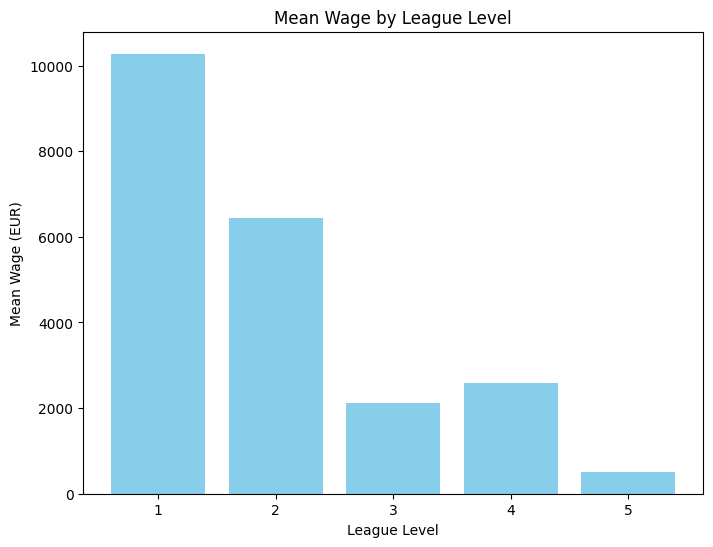

In [7]:
mean_wage_by_league = data.groupby('league_level')['wage_eur'].mean()

# Extract league levels and mean wages
league_levels = mean_wage_by_league.index
mean_wages = mean_wage_by_league.values

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(league_levels, mean_wages, color='skyblue')
plt.xlabel('League Level')
plt.ylabel('Mean Wage (EUR)')
plt.title('Mean Wage by League Level')
plt.show()

## Dystrybucja zarobków i wartości zawodników

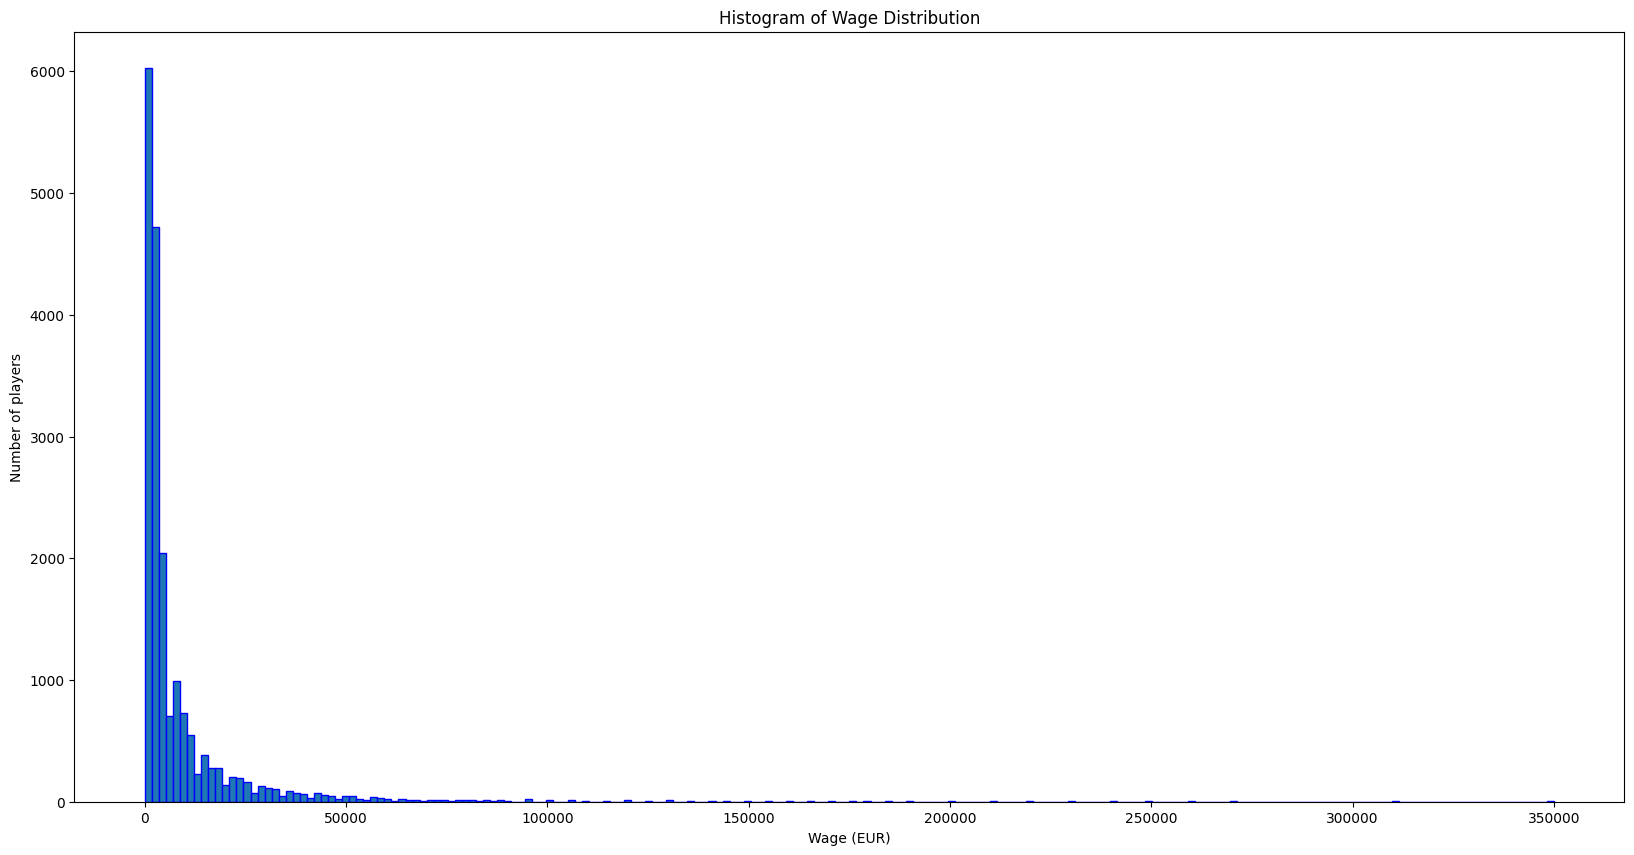

In [8]:
num_bins = 200

hist_range = (0, data['wage_eur'].max())

plt.figure(figsize=(20,10))
plt.hist(data['wage_eur'], bins=num_bins, range=hist_range, edgecolor='blue')

plt.xlabel('Wage (EUR)')
plt.ylabel('Number of players')
plt.title('Histogram of Wage Distribution')

plt.show()

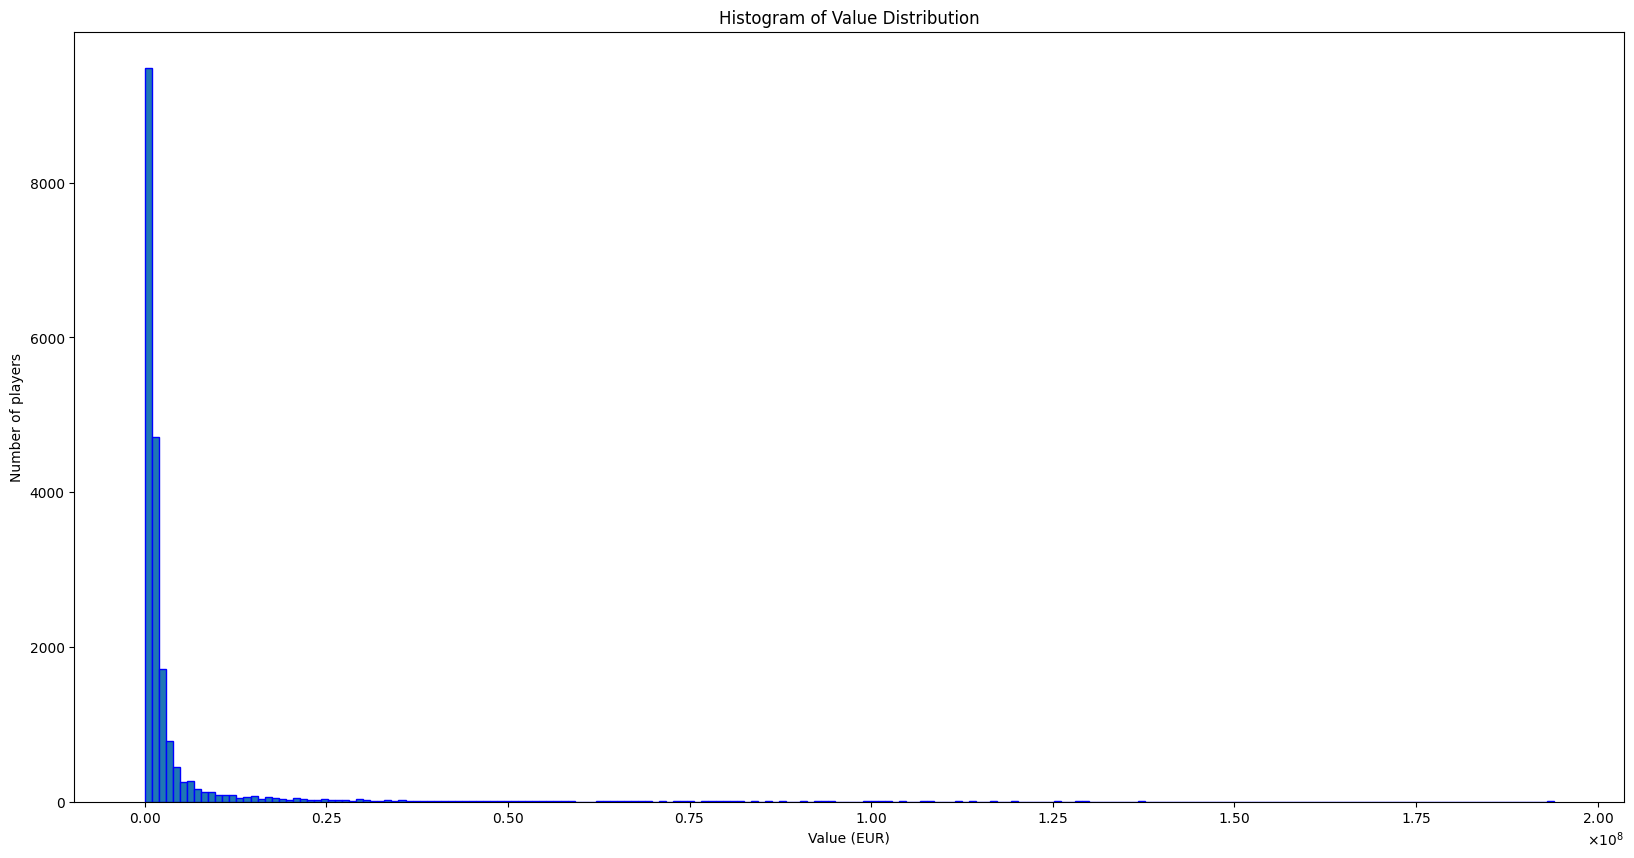

In [9]:
num_bins = 200

hist_range = (1, data['value_eur'].max())

plt.figure(figsize=(20,10))
plt.hist(data['value_eur'], bins=num_bins, range=hist_range, edgecolor='blue')

plt.xlabel('Value (EUR)')
plt.ylabel('Number of players')
plt.title('Histogram of Value Distribution')

plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.show()

## Dystrybucje wieku, wzrostu, wagi i poziomu ligii

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>],
       [<Axes: title={'center': 'weight_kg'}>,
        <Axes: title={'center': 'league_level'}>]], dtype=object)

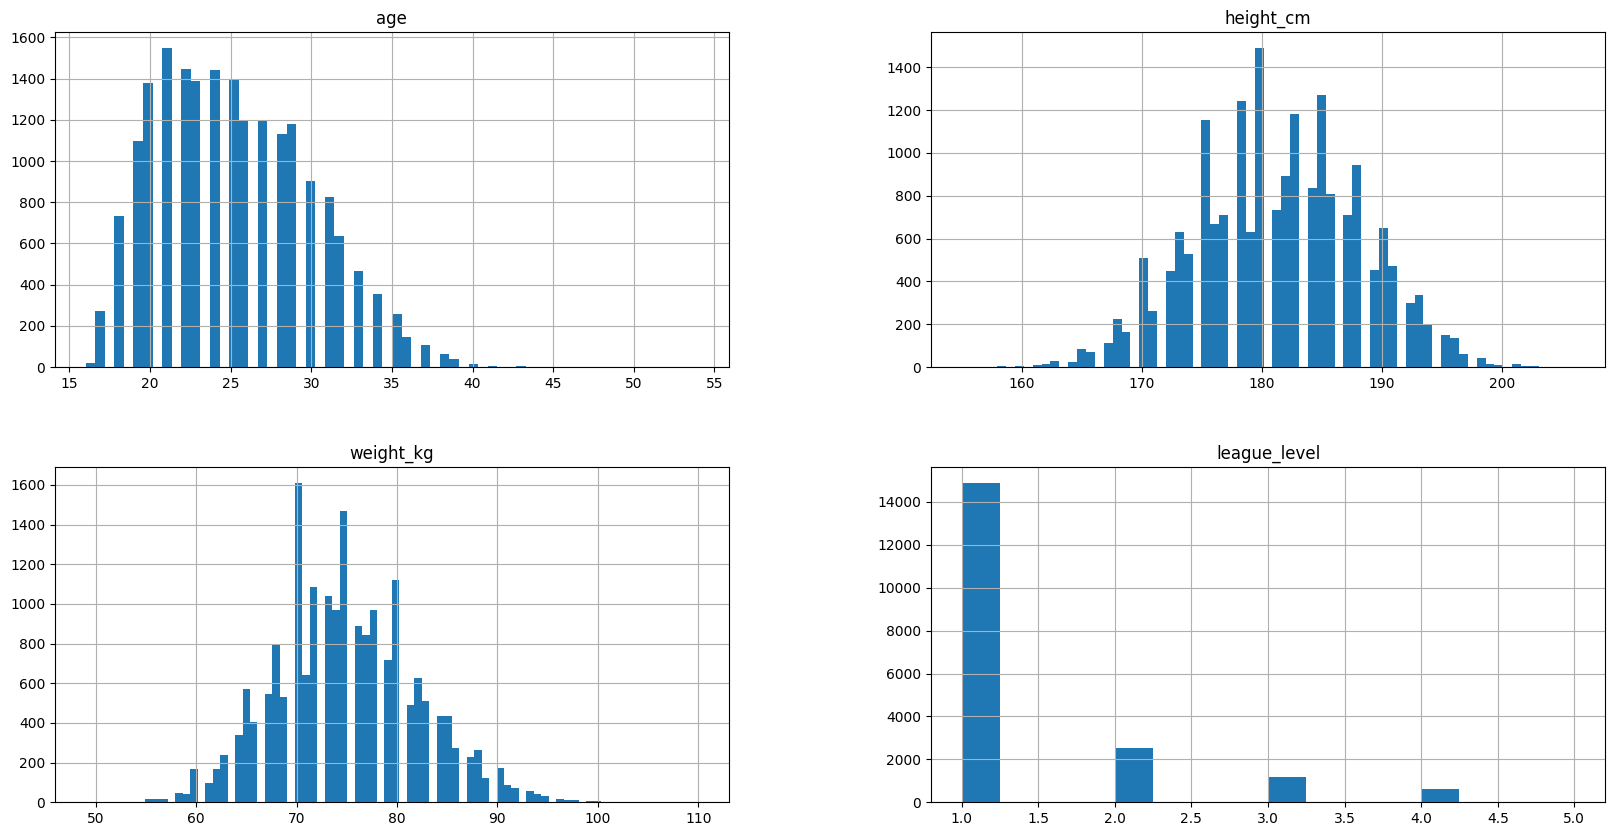

In [10]:
dataShort = data[['age', 'height_cm', 'weight_kg', 'league_level']]
dataShort.hist(bins='auto', figsize=(20, 10))

## Korelacja atrybutów

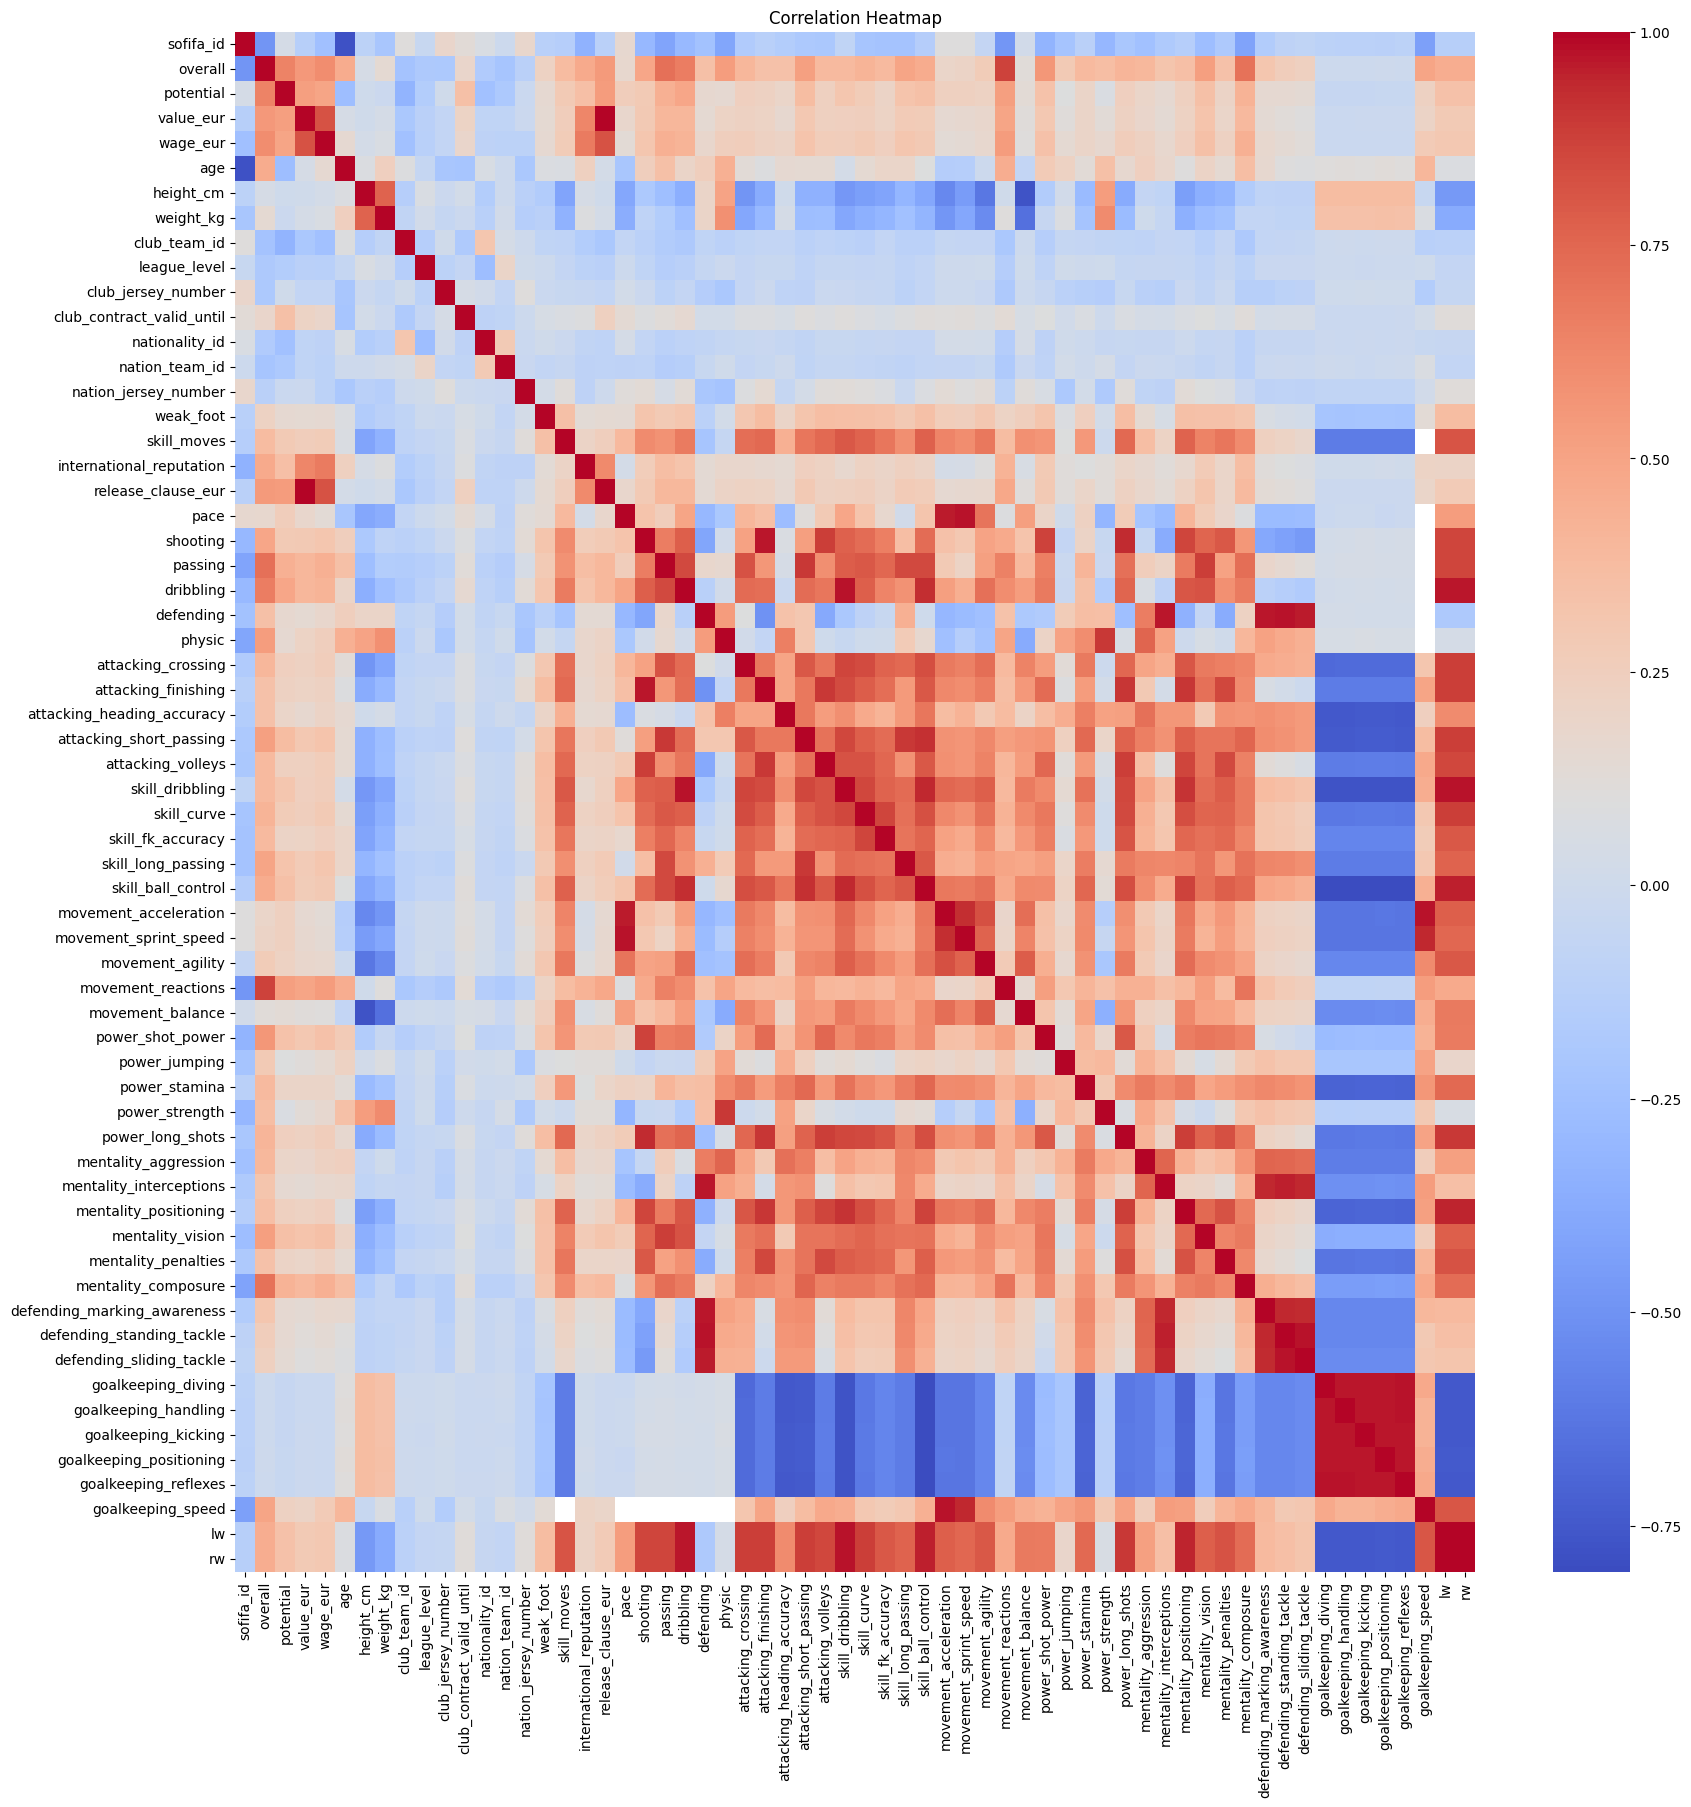

In [11]:
dataNumeric = data.select_dtypes(include=['number'])

correlation_matrix = dataNumeric.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

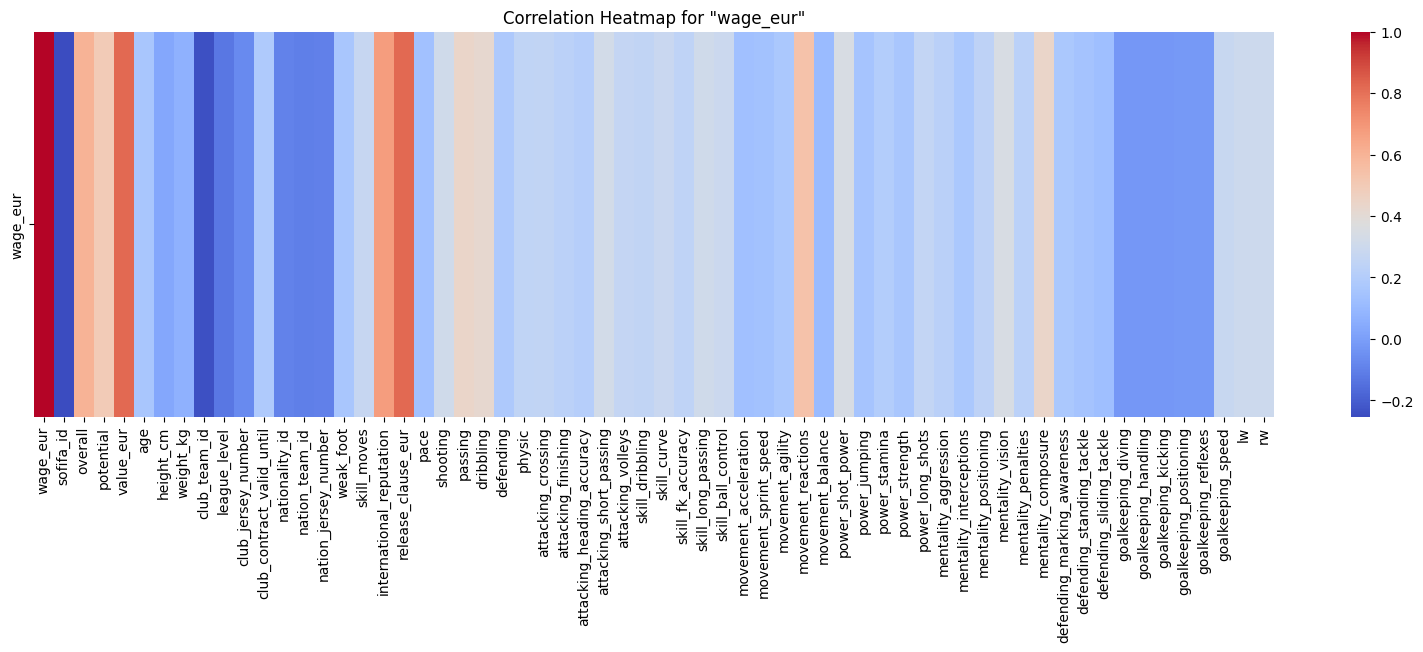

In [12]:
attributes_of_interest = ['wage_eur']
selected_attributes = attributes_of_interest + [col for col in dataNumeric.columns if col not in attributes_of_interest]

subset_correlation_matrix = correlation_matrix.loc[attributes_of_interest, selected_attributes]

plt.figure(figsize=(20, 5))
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for "wage_eur"')
plt.show()

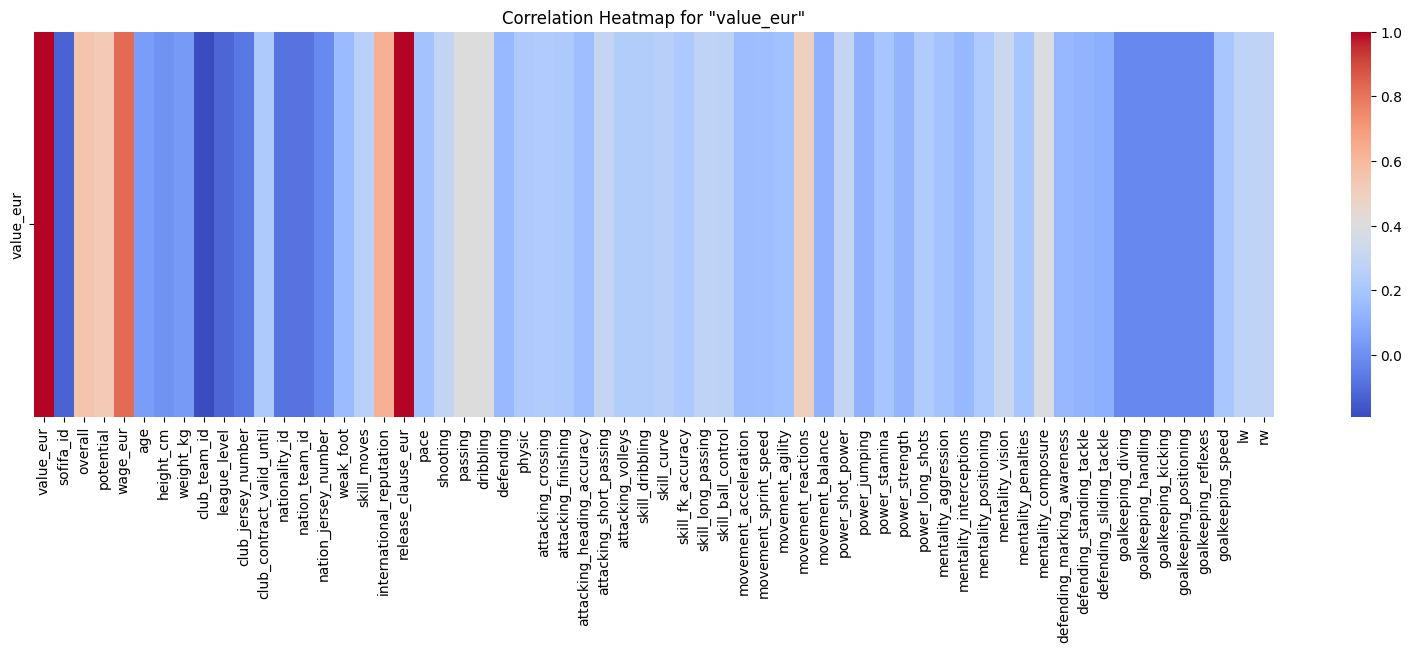

In [13]:
attributes_of_interest = ['value_eur']
selected_attributes = attributes_of_interest + [col for col in dataNumeric.columns if col not in attributes_of_interest]

subset_correlation_matrix = correlation_matrix.loc[attributes_of_interest, selected_attributes]

plt.figure(figsize=(20, 5))
sns.heatmap(subset_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for "value_eur"')
plt.show()

## Lista najbardziej skorelowanych atrybutów

In [14]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top_correlations = corr_pairs.abs().sort_values(ascending=False).head(50)
top_correlations

rw                           lw                             1.000000
lw                           rw                             1.000000
release_clause_eur           value_eur                      0.995460
value_eur                    release_clause_eur             0.995460
defending                    defending_standing_tackle      0.977879
defending_standing_tackle    defending                      0.977879
                             defending_sliding_tackle       0.977414
defending_sliding_tackle     defending_standing_tackle      0.977414
rw                           skill_dribbling                0.974740
skill_dribbling              lw                             0.974740
                             rw                             0.974740
lw                           skill_dribbling                0.974740
goalkeeping_diving           goalkeeping_reflexes           0.973929
goalkeeping_reflexes         goalkeeping_diving             0.973929
goalkeeping_speed            movem

## PCA

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [39]:
# standarize data and remove NaNs
numericColumns = dataNumeric.select_dtypes(include='number').columns.tolist()
dataNoNans = dataNumeric[numericColumns].fillna(0, inplace=False)
dataNoNans[numericColumns] = StandardScaler().fit_transform(dataNoNans[numericColumns])
dataNoNans

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,lw,rw
0,-2.716263,3.957501,3.601780,9.888379,15.994054,1.851089,-1.646467,-0.416315,-0.925694,-0.46643,...,-0.614426,-1.055483,-0.592145,-0.308358,-0.063713,-0.130678,-0.474818,-0.336925,2.310768,2.310768
1,-1.587450,3.812154,3.437470,15.348263,13.422750,1.429869,0.539166,0.856805,-0.926650,-0.46643,...,-0.284737,-1.296387,-0.080012,-0.605286,-0.244828,-0.482391,-0.362988,-0.336925,1.879122,1.879122
2,-7.791226,3.666806,3.273160,5.546784,13.422750,2.272309,0.830584,1.139720,-0.926834,-0.46643,...,-0.755721,-1.055483,-0.535241,-0.308358,-0.063713,-0.130678,-0.307073,-0.336925,2.064113,2.064113
3,-1.501426,3.666806,3.273160,16.598117,13.422750,0.798039,-0.917923,-0.982145,-0.925694,-0.46643,...,-0.755721,-0.814579,-0.421434,-0.427130,-0.063713,-0.072059,-0.307073,-0.336925,2.187441,2.187441
4,-1.423243,3.666806,3.273160,16.137644,17.536836,1.008649,-0.043669,-0.699230,-0.926852,-0.46643,...,0.798525,0.341761,-0.080012,-0.189587,-0.667428,-0.365153,-0.195244,-0.336925,2.064113,2.064113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,1.127775,-2.728494,-3.134932,-0.364363,-0.410863,-0.676231,-0.189378,-1.547976,1.142169,-0.46643,...,-0.237639,0.100857,-0.592145,-0.367744,-0.667428,-0.072059,-0.195244,-0.336925,-0.525766,-0.525766
19235,1.130659,-2.728494,-1.984762,-0.359101,-0.436576,-1.308061,-0.917923,-0.699230,-0.918854,-0.46643,...,-0.190540,0.052676,-0.307627,-0.248973,-0.607056,-0.482391,-0.362988,-0.336925,-0.464102,-0.464102
19236,1.157287,-2.728494,-2.642002,-0.360417,-0.436576,-0.886841,-0.480796,-0.416315,1.116244,-0.46643,...,-0.190540,0.100857,-0.478338,-0.605286,-0.546685,-0.365153,-0.586647,-0.336925,-0.525766,-0.525766
19237,1.159506,-2.728494,-1.820452,-0.359101,-0.436576,-1.308061,-1.209340,-1.265061,1.116244,-0.46643,...,-1.603491,-1.681834,-0.535241,-0.367744,-0.546685,-0.130678,-0.083414,-0.336925,-0.464102,-0.464102


In [40]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0, n_components=len(numericColumns))
dataTransformed = pca.fit_transform(dataNoNans)
df_transformed = pd.DataFrame(
        data = dataTransformed,
        columns = numericColumns
    ) 
n_components = len(pca.components_)
pca_cols = [f'PC{x+1}' for x in range(n_components)]
df_pca_components = pd.DataFrame(data = np.transpose(pca.components_), columns=pca_cols, index=dataNumeric.columns)
df_pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62
sofifa_id,0.027290,-0.218753,-0.068459,0.248864,0.271231,-0.008060,-0.122106,0.054532,-0.210586,-0.188320,...,0.003521,-0.000838,-0.002390,0.007452,0.002654,0.004136,0.001945,0.000776,0.000134,-0.000000e+00
overall,-0.082685,0.313368,0.062261,0.020614,-0.070403,-0.051537,0.076610,-0.030076,-0.219554,-0.042661,...,-0.020570,-0.012243,-0.059905,-0.022373,0.016218,-0.001018,-0.007275,-0.006329,0.000057,6.373123e-17
potential,-0.058861,0.197123,-0.002136,0.271237,0.178732,-0.198992,-0.019718,0.052296,-0.342143,-0.058024,...,0.010183,0.005403,0.022251,0.004646,-0.000527,0.002128,0.000520,0.000875,0.000189,-2.292194e-17
value_eur,-0.053128,0.259250,0.011501,0.293002,0.172432,0.162875,-0.052637,-0.127678,0.190711,-0.063031,...,-0.011318,0.223109,0.702584,0.017033,-0.002666,-0.003351,-0.000721,-0.000653,-0.000412,-3.457571e-16
wage_eur,-0.056815,0.271983,0.025096,0.224241,0.120854,0.125563,-0.054958,-0.135690,0.189028,0.017352,...,0.003253,-0.012820,-0.051252,0.003206,-0.000693,0.001686,0.000116,0.000060,0.000138,5.813233e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goalkeeping_positioning,0.161222,0.172084,-0.049649,0.017193,-0.115569,-0.050332,0.035782,0.003862,-0.091506,-0.004179,...,-0.021445,-0.014135,-0.002469,0.087211,-0.020592,-0.020060,0.001665,-0.002401,-0.000747,1.852353e-16
goalkeeping_reflexes,0.161899,0.170793,-0.050659,0.020245,-0.112801,-0.048682,0.033110,0.004550,-0.090336,-0.005844,...,0.747889,-0.020678,0.034661,0.087709,-0.010877,-0.008801,0.006320,-0.002656,0.000577,9.501233e-17
goalkeeping_speed,0.157118,0.167223,-0.052387,0.024636,-0.122664,-0.044088,0.081196,-0.011329,-0.107576,0.008374,...,-0.007558,-0.028774,-0.008525,0.188006,-0.043858,-0.064071,0.015458,0.008676,-0.414423,1.008521e-15
lw,-0.159755,0.022379,-0.056582,0.016597,0.039708,-0.045407,-0.004156,0.029517,-0.100786,-0.082702,...,0.000652,-0.002281,0.000167,-0.000983,-0.001690,-0.000875,0.000181,0.000038,0.000085,7.071068e-01


In [35]:
import random

def ggbiplot_pca(score, coeff,labels=None):
    plt.figure(figsize=(20, 12))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1/(xs.max() - xs.min())
    scaley = 1/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, marker='.', alpha=0.25)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'g',alpha = 1)
        if labels is None:
            plt.text(
                coeff[i,0] * 1.15, 
                coeff[i,1] * 1.15, 
                "Var"+str(i+1), 
                color = 'r', ha = 'center', va = 'center')
        else:
            plt.text(
                coeff[i,0] * 1.15 + random.uniform(-0.01, 0.01), 
                coeff[i,1] * 1.15 + random.uniform(-0.01, 0.01),
                labels[i], 
                color = 'r', ha = 'center', va = 'center', fontsize = 8)
    #plt.xlim(-0.25,1)
    #plt.ylim(-0.5,1)
    plt.xlabel(f"PC{0}")
    plt.ylabel(f"PC{1}")
    plt.grid()

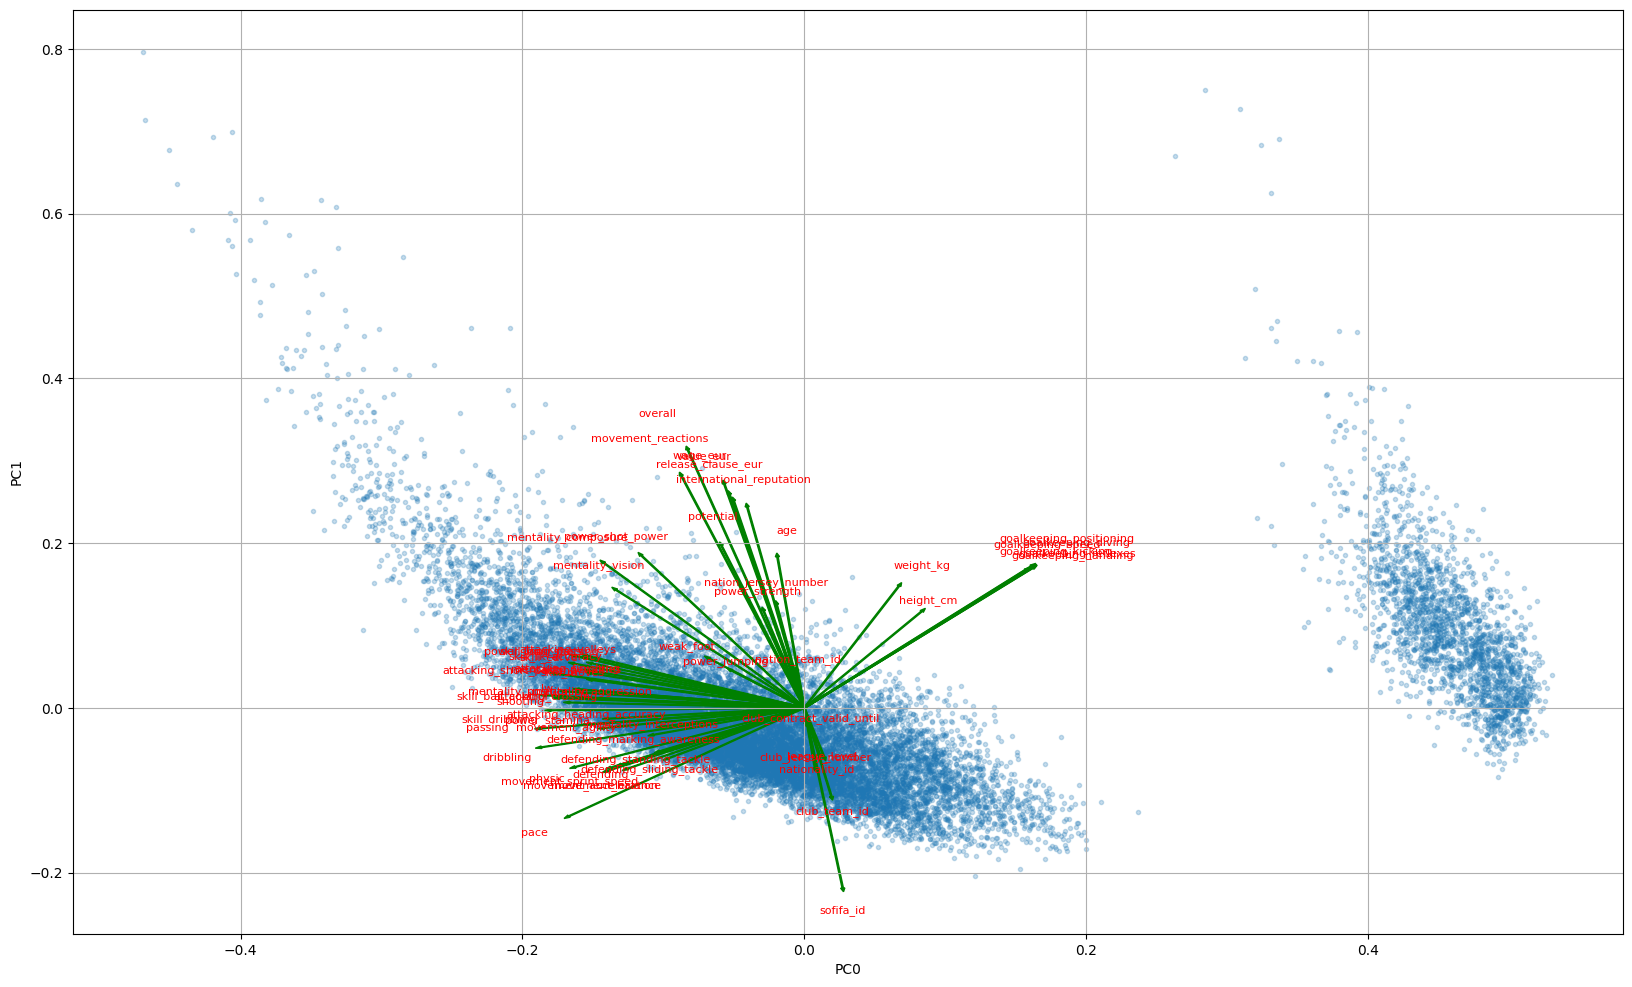

In [36]:
ggbiplot_pca(
    score = df_transformed.values[:,0:2],
    coeff = np.transpose(df_pca_components.values)[0:2, :].T,
    labels = numericColumns
)
plt.show()

In [20]:
criterium = 0.9
sum = np.cumsum(pca.explained_variance_ratio_)
for i in range(len(pca.explained_variance_ratio_)):
    val = sum[i]
    if val >= criterium:
        print(f'Number of components that satisfy percentage criterion of the explained variance: {i+1}')
        break

Number of components that satisfy percentage criterion of the explained variance: 17


In [31]:
pca_dict = {
        'Proportion of Variance': pca.explained_variance_ratio_,
        'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
    }
    
# summary
df_pca_summarize = pd.DataFrame.from_dict(
        data = pca_dict,
        columns = pca_cols[:len(numericColumns)],
        orient='index'
    )

<Axes: >

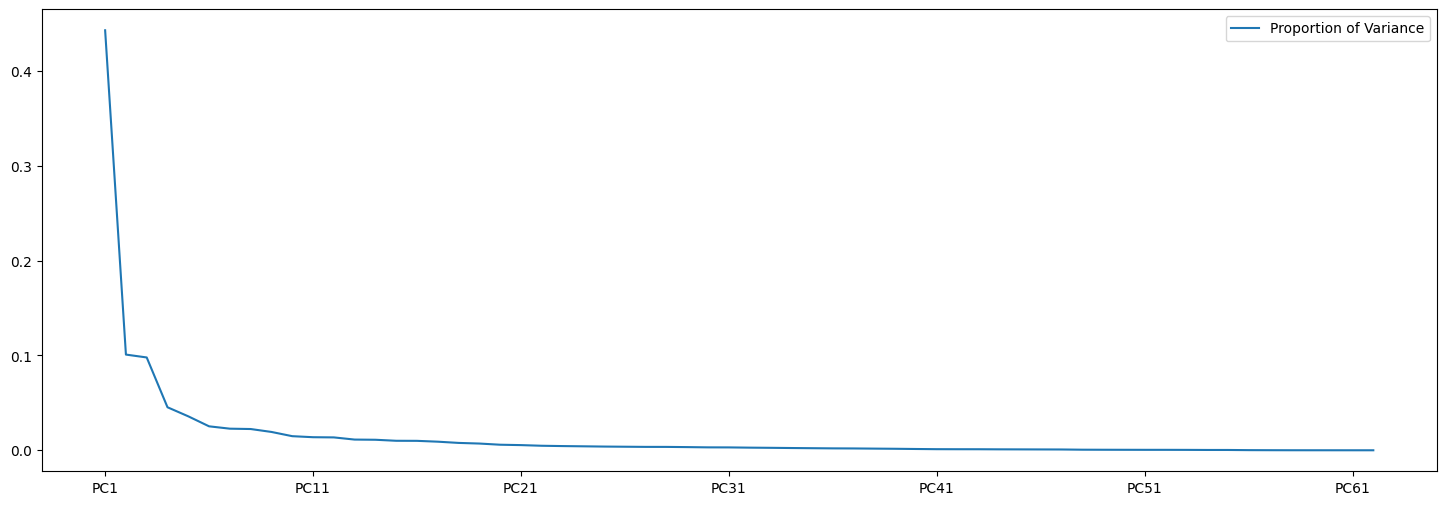

In [32]:
df_pca_summarize.T.plot.line(y=0, figsize=(18,6))